In [1]:
import selenium
from selenium import webdriver
from urllib.parse import quote
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
%matplotlib inline
import platform
from scipy.stats import *
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': 
    # 윈도우   
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [13]:
data = pd.read_csv('./final/(0423)진짜 최종.csv')

In [14]:
data_raw= data.copy()

In [15]:
data = data.drop('Unnamed: 0',axis=1)

In [16]:
data

,산지,최종수량,year,month,day,1kg price,date2,temp
0,통영,254.0,2006,4,5,3200.00,2006.04.05,12.075
1,통영,535.2,2006,4,5,4000.00,2006.04.05,12.075
2,통영,70.0,2006,4,5,4285.71,2006.04.05,12.075
3,통영,194.7,2006,4,5,4454.55,2006.04.05,12.075
4,통영,493.0,2006,4,5,3941.18,2006.04.05,12.075
...,...,...,...,...,...,...,...,...
65512,삼천포,2.0,2021,4,2,3100.00,2021.04.02,13.150
65513,삼천포,3.6,2021,4,2,7833.33,2021.04.02,13.150
65514,삼천포,22.8,2021,4,5,6894.74,2021.04.05,13.325
65515,삼천포,30.0,2021,4,6,6700.00,2021.04.06,13.350


In [22]:
data_lr = data[['산지','최종수량','1kg price','temp','date2']]

In [23]:
data_lr.columns = ['from','qty','1kg price','temp','date']

In [28]:
grouped=data_lr.groupby('date').agg({'qty':'sum','1kg price':'mean','temp':'mean'}).round(2)

In [100]:
grouped.to_csv('./final/(0425)그룹화 최종.csv')

In [101]:
grouped

,qty,1kg price,temp,temp_sc,qty_sc
date,,,,,
2006.04.04,978.3,4948.71,12.02,-0.853048,-0.652525
2006.04.05,4600.7,4447.32,11.90,-0.876107,0.042461
2006.04.06,3842.2,4620.74,12.12,-0.833833,-0.103063
2006.04.07,4777.3,4060.83,12.18,-0.822304,0.076343
2006.04.08,4773.5,4547.00,12.17,-0.824225,0.075614
...,...,...,...,...,...
2021.04.03,561.4,4642.59,13.30,-0.607090,-0.732510
2021.04.05,421.1,5653.34,13.32,-0.603247,-0.759428
2021.04.06,290.7,7392.06,13.35,-0.597483,-0.784446


C:\Users\choi yeseul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1kg price', ylabel='Density'>

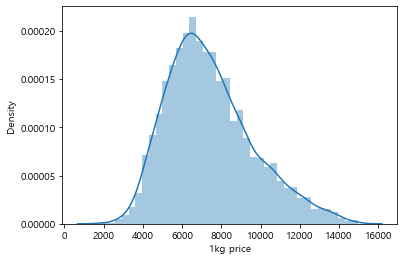

In [30]:
sns.distplot(grouped['1kg price'])

In [53]:
grouped['temp_sc'] = scale.fit_transform(grouped[['temp']])
grouped['qty_sc'] = scale.fit_transform(grouped[['qty']])

In [54]:
grouped

,qty,1kg price,temp,temp_sc,qty_sc
date,,,,,
2006.04.04,978.3,4948.71,12.02,-0.853048,-0.652525
2006.04.05,4600.7,4447.32,11.90,-0.876107,0.042461
2006.04.06,3842.2,4620.74,12.12,-0.833833,-0.103063
2006.04.07,4777.3,4060.83,12.18,-0.822304,0.076343
2006.04.08,4773.5,4547.00,12.17,-0.824225,0.075614
...,...,...,...,...,...
2021.04.03,561.4,4642.59,13.30,-0.607090,-0.732510
2021.04.05,421.1,5653.34,13.32,-0.603247,-0.759428
2021.04.06,290.7,7392.06,13.35,-0.597483,-0.784446


In [55]:
corr = grouped.corr(method = 'pearson')
corr

,qty,1kg price,temp,temp_sc,qty_sc
qty,1.000000,0.241096,-0.553020,-0.553020,1.000000
1kg price,0.241096,1.000000,0.048214,0.048214,0.241096
temp,-0.553020,0.048214,1.000000,1.000000,-0.553020
temp_sc,-0.553020,0.048214,1.000000,1.000000,-0.553020
qty_sc,1.000000,0.241096,-0.553020,-0.553020,1.000000


In [57]:
data_lr

,from,qty,1kg price,temp,date
0,통영,254.0,3200.00,12.075,2006.04.05
1,통영,535.2,4000.00,12.075,2006.04.05
2,통영,70.0,4285.71,12.075,2006.04.05
3,통영,194.7,4454.55,12.075,2006.04.05
4,통영,493.0,3941.18,12.075,2006.04.05
...,...,...,...,...,...
65512,삼천포,2.0,3100.00,13.150,2021.04.02
65513,삼천포,3.6,7833.33,13.150,2021.04.02
65514,삼천포,22.8,6894.74,13.325,2021.04.05
65515,삼천포,30.0,6700.00,13.350,2021.04.06


In [60]:
data_lr['year'] = data_lr['date'].str.split('.').str.get(0)
data_lr['month'] = data_lr['date'].str.split('.').str.get(1)
data_lr['day'] = data_lr['date'].str.split('.').str.get(2)

In [62]:
data_lr['date2'] = data_lr['year'].str.cat(data_lr['month'],sep='.')

In [63]:
data_lr

,from,qty,1kg price,temp,date,year,month,day,date2
0,통영,254.0,3200.00,12.075,2006.04.05,2006,04,05,2006.04
1,통영,535.2,4000.00,12.075,2006.04.05,2006,04,05,2006.04
2,통영,70.0,4285.71,12.075,2006.04.05,2006,04,05,2006.04
3,통영,194.7,4454.55,12.075,2006.04.05,2006,04,05,2006.04
4,통영,493.0,3941.18,12.075,2006.04.05,2006,04,05,2006.04
...,...,...,...,...,...,...,...,...,...
65512,삼천포,2.0,3100.00,13.150,2021.04.02,2021,04,02,2021.04
65513,삼천포,3.6,7833.33,13.150,2021.04.02,2021,04,02,2021.04
65514,삼천포,22.8,6894.74,13.325,2021.04.05,2021,04,05,2021.04
65515,삼천포,30.0,6700.00,13.350,2021.04.06,2021,04,06,2021.04


In [65]:
group = data_lr.groupby(['year','month'])
grouped2 = group.agg({'qty':'sum','1kg price':'mean'}).round(2)

In [66]:
grouped2

qty  1kg price
year month                     
2006 04      79398.5    4936.02
     05      34612.7    5231.31
     06      15556.6    5587.33
     07      14119.5    5494.06
     08      11779.5    5889.41
...              ...        ...
2020 12     134632.1   11078.21
2021 01     121173.1    9193.63
     02      85059.1    8785.29
     03      33416.2    7527.60
     04       3707.0    6674.00

[181 rows x 2 columns]

In [67]:
df = grouped2.reset_index().pivot( 'month','year', 'qty')
df

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,,,,,
01,NaN,316297.8,308009.9,319591.3,288439.9,344297.5,341035.3,300715.5,319349.5,269650.5,219956.6,197778.5,196652.5,188790.9,127738.4,121173.1
02,NaN,266473.0,255086.1,226840.3,270642.4,197344.1,250013.4,182736.3,172980.0,213294.1,174987.0,125269.3,156748.5,96313.9,79244.6,85059.1
03,NaN,175121.7,173494.4,150147.8,160943.2,165951.2,218023.0,129232.9,112662.4,87414.9,83039.2,80144.2,74501.7,45764.8,40017.8,33416.2
04,79398.5,80941.9,73488.4,72059.4,75300.5,70253.8,82763.5,59047.7,34624.2,33202.6,24744.1,26073.8,15184.3,19522.8,15953.7,3707.0
05,34612.7,21050.0,31259.3,25504.4,24413.4,31366.1,20826.7,19478.5,15500.8,11032.2,9228.3,8696.5,6441.9,6317.4,6801.8,NaN
06,15556.6,11234.5,17125.3,11958.5,12718.1,14156.3,9904.6,9256.4,7241.2,5807.0,4386.3,5200.4,4013.7,3057.8,2637.3,NaN
07,14119.5,11111.1,12011.8,10557.5,10502.7,9990.7,7310.0,8369.9,6509.9,4956.2,4046.0,3805.1,2940.0,2719.5,2473.0,NaN
08,11779.5,11275.8,15320.7,10377.0,10929.2,10741.1,7735.7,7484.1,7771.2,4656.5,4139.5,4255.7,2821.9,2600.3,2078.8,NaN
09,32728.3,36674.7,35957.2,32421.0,27800.1,19051.1,27519.1,23116.2,20884.1,14450.7,11641.5,11844.0,11246.3,7707.9,6449.1,NaN


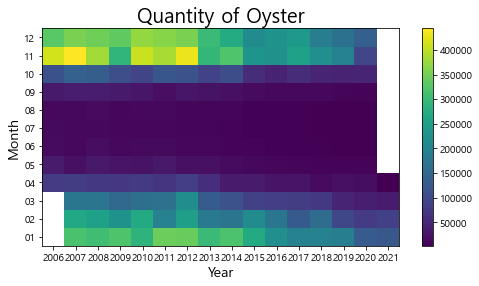

In [68]:
plt.figure(figsize =(8,4))
plt.pcolor(df)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.title('Quantity of Oyster', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.colorbar()

plt.show()


In [70]:
df1 = grouped2.reset_index().pivot( 'month','year', '1kg price')
df1

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,,,,,
01,NaN,4944.34,4761.71,7637.03,6550.00,8030.88,7590.75,6010.28,7589.58,6841.69,8843.49,8835.77,6928.24,7871.08,9092.51,9193.63
02,NaN,5254.82,5093.07,6407.75,7231.89,7227.96,6398.97,5004.86,6827.18,7068.74,7659.27,5890.84,7603.04,7315.19,8143.48,8785.29
03,NaN,4707.51,4380.56,6556.24,6209.89,6429.64,5698.77,4238.02,6518.81,6486.79,7447.35,5166.34,6264.94,7053.08,8750.54,7527.60
04,4936.02,4527.44,4672.05,6051.80,5776.43,6300.24,5106.26,4348.35,6689.52,6345.41,6598.09,5036.64,6219.59,6929.28,7416.12,6674.00
05,5231.31,4808.74,4939.38,7133.33,6192.42,7142.72,4951.00,4777.04,6955.69,7498.62,7069.62,5342.36,6541.66,7829.12,6400.26,NaN
06,5587.33,5716.24,5829.88,8122.14,6788.65,8324.84,6414.86,5528.58,7977.24,8889.75,7353.73,6428.37,7046.24,10102.76,8821.51,NaN
07,5494.06,5213.10,5303.99,6193.26,6158.18,6710.59,6377.66,4663.88,6652.19,8515.53,6424.57,4666.43,7111.59,9641.66,8764.58,NaN
08,5889.41,5504.72,6432.03,6575.02,6975.91,7910.20,6642.91,4972.57,8094.07,9900.73,7174.28,6884.24,7309.68,9652.92,7536.39,NaN
09,5988.83,5294.71,6268.87,6195.88,6844.76,8955.13,7220.43,5579.93,7501.94,9060.45,8120.85,6460.74,7435.11,8600.76,9500.60,NaN


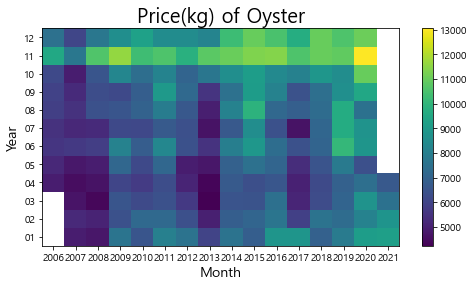

In [71]:
plt.figure(figsize =(8,4))
plt.pcolor(df1)
plt.xticks(np.arange(0.5, len(df1.columns), 1), df.columns)
plt.yticks(np.arange(0.5, len(df1.index), 1), df.index)
plt.title('Price(kg) of Oyster', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.colorbar()

plt.show()


In [72]:
data_lr

,from,qty,1kg price,temp,date,year,month,day,date2
0,통영,254.0,3200.00,12.075,2006.04.05,2006,04,05,2006.04
1,통영,535.2,4000.00,12.075,2006.04.05,2006,04,05,2006.04
2,통영,70.0,4285.71,12.075,2006.04.05,2006,04,05,2006.04
3,통영,194.7,4454.55,12.075,2006.04.05,2006,04,05,2006.04
4,통영,493.0,3941.18,12.075,2006.04.05,2006,04,05,2006.04
...,...,...,...,...,...,...,...,...,...
65512,삼천포,2.0,3100.00,13.150,2021.04.02,2021,04,02,2021.04
65513,삼천포,3.6,7833.33,13.150,2021.04.02,2021,04,02,2021.04
65514,삼천포,22.8,6894.74,13.325,2021.04.05,2021,04,05,2021.04
65515,삼천포,30.0,6700.00,13.350,2021.04.06,2021,04,06,2021.04


# 1kg price만을 이용해 시계열 데이터 처리 및 선형회귀 분석

In [102]:
data_lr

,from,qty,1kg price,temp,date,year,month,day,date2
0,통영,254.0,3200.00,12.075,2006.04.05,2006,04,05,2006.04
1,통영,535.2,4000.00,12.075,2006.04.05,2006,04,05,2006.04
2,통영,70.0,4285.71,12.075,2006.04.05,2006,04,05,2006.04
3,통영,194.7,4454.55,12.075,2006.04.05,2006,04,05,2006.04
4,통영,493.0,3941.18,12.075,2006.04.05,2006,04,05,2006.04
...,...,...,...,...,...,...,...,...,...
65512,삼천포,2.0,3100.00,13.150,2021.04.02,2021,04,02,2021.04
65513,삼천포,3.6,7833.33,13.150,2021.04.02,2021,04,02,2021.04
65514,삼천포,22.8,6894.74,13.325,2021.04.05,2021,04,05,2021.04
65515,삼천포,30.0,6700.00,13.350,2021.04.06,2021,04,06,2021.04


In [73]:
group = data_lr.groupby(['date'])
grouped_lr = group.agg({'qty':'sum','1kg price':'mean'}).round(2)
grouped_lr

,qty,1kg price
date,,
2006.04.04,978.3,4948.71
2006.04.05,4600.7,4447.32
2006.04.06,3842.2,4620.74
2006.04.07,4777.3,4060.83
2006.04.08,4773.5,4547.00
...,...,...
2021.04.03,561.4,4642.59
2021.04.05,421.1,5653.34
2021.04.06,290.7,7392.06


In [74]:
y= grouped['1kg price'].values

In [75]:
ratio = 0.75
cut = np.int(len(y)*ratio)
cut

3451

In [76]:
train = y[:cut]
test = y[cut:]
len(y), len(train)

(4602, 3451)

In [77]:
def split_seq(data,n_steps) :
    x,y = [], []
    for i in range(len(data)) : 
        if i > len(data)-(n_steps+1) : break
        x.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(x), np.array(y)

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# 모델만들기
lr = LinearRegression()

n_steps = 10

# 훈련데이터
train_x, train_y = split_seq(train,n_steps) # 사용자정의함수

# 검증데이터
test_x, test_y = split_seq(test,n_steps)

In [88]:
len(train_x)

3441

In [89]:
lr.fit(train_x,train_y)

LinearRegression()

In [90]:
lr.score(test_x,test_y).round(4)

0.7522

In [91]:
y_pred = lr.predict(test_x)
mse = mean_squared_error(test_y,y_pred)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {0:.3f}'.format(mse, rmse))
print('Variance Score : {0:.3f}'.format(r2_score(test_y,y_pred)))

MSE : 1082479.627, RMSE : 1082479.627
Variance Score : 0.752


In [113]:
lr.coef_

array([ 0.04541969,  0.03763803,  0.01923597, -0.04399854,  0.02360759,
        0.04122829, -0.03893576, -0.07202641,  0.07381488,  0.86001737])

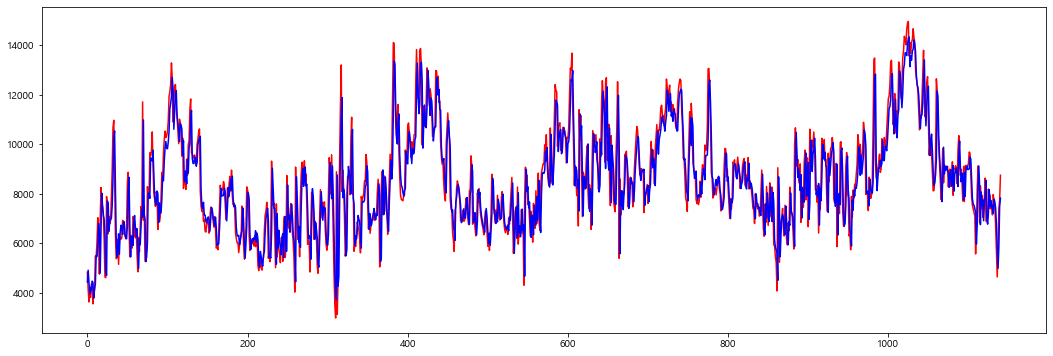

In [83]:
plt.figure(figsize=[18,6])
plt.plot(test_y,c='r')
plt.plot(y_pred,c='b')
plt.show()

In [116]:
grouped_lr['1kg price_sc'] = scale.fit_transform(grouped[['1kg price']])

In [118]:
grouped_lr['1kg price_log'] = np.log(grouped[['1kg price']])

C:\Users\choi yeseul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1kg price_log', ylabel='Density'>

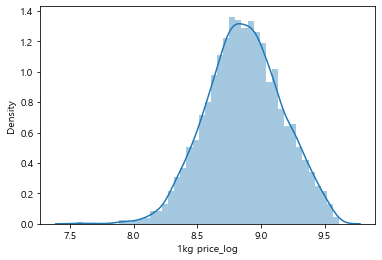

In [119]:
sns.distplot(grouped_lr['1kg price_log'])

In [120]:
grouped_lr

,qty,1kg price,1kg price_sc,1kg price_log
date,,,,
2006.04.04,978.3,4948.71,-1.123396,8.506882
2006.04.05,4600.7,4447.32,-1.350797,8.400057
2006.04.06,3842.2,4620.74,-1.272144,8.438310
2006.04.07,4777.3,4060.83,-1.526086,8.309143
2006.04.08,4773.5,4547.00,-1.305588,8.422223
...,...,...,...,...
2021.04.03,561.4,4642.59,-1.262234,8.443028
2021.04.05,421.1,5653.34,-0.803817,8.640002
2021.04.06,290.7,7392.06,-0.015236,8.908162


# 표준화 스케일링 후 시계열 분석

In [123]:
y= grouped_lr['1kg price_sc'].values
ratio = 0.75
cut = np.int(len(y)*ratio)
cut
train = y[:cut]
test = y[cut:]
len(y), len(train)

(4602, 3451)

In [124]:
# 모델만들기
lr = LinearRegression()

n_steps = 10

# 훈련데이터
train_x, train_y = split_seq(train,n_steps) # 사용자정의함수

# 검증데이터
test_x, test_y = split_seq(test,n_steps)

lr.fit(train_x,train_y)

y_pred = lr.predict(test_x)
mse = mean_squared_error(test_y,y_pred)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {0:.3f}'.format(mse, rmse))
print('Variance Score : {0:.3f}'.format(r2_score(test_y,y_pred)))

MSE : 0.223, RMSE : 0.223
Variance Score : 0.752


# 로그 변환 후 시계열 분석

In [125]:
y= grouped_lr['1kg price_log'].values
ratio = 0.75
cut = np.int(len(y)*ratio)
cut
train = y[:cut]
test = y[cut:]
len(y), len(train)

(4602, 3451)

In [126]:
# 모델만들기
lr = LinearRegression()

n_steps = 10

# 훈련데이터
train_x, train_y = split_seq(train,n_steps) # 사용자정의함수

# 검증데이터
test_x, test_y = split_seq(test,n_steps)

lr.fit(train_x,train_y)

y_pred = lr.predict(test_x)
mse = mean_squared_error(test_y,y_pred)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {0:.3f}'.format(mse, rmse))
print('Variance Score : {0:.3f}'.format(r2_score(test_y,y_pred)))

MSE : 0.018, RMSE : 0.018
Variance Score : 0.710


# 시계열 데이터 회귀분석의 경우 표준화 스케일링 후 결과값이 가장 좋다고 볼 수 있다